<h1>Creación de módulos propios</h1>

Start by organizing your project directory. Typically, you should have a folder structure that separates your code into different modules and packages. For example:

In [ ]:
my_project/
├── main.py
├── my_module/
│   ├── __init__.py
│   └── my_script.py
├── my_package/
│   ├── __init__.py
│   ├── module_a.py
│   └── module_b.py

<h2>La Ruta Absoluta</h2>

Use sys.path (Not Recommended):

One way to add a path to your own module is to use sys.path. This approach is not recommended for production code but can be useful for testing and experimentation. You can add a path to your module by appending the directory to sys.path:

In [ ]:
import sys
sys.path.append('/path/to/your/module_directory')


In [ ]:
# py -m pip install --upgrade pip
# pip install --upgrade setuptools --user
# pip install --upgrade build

import sys
# import ver

# se agrega la ruta pero no es pragmática pq va en detrimento de otras opciones
# from gyr1 import ver

sys.path.append("C:\Users\gisel\Downloads\Coding\Repositorios\Python_diplomatura\Python-intermedio\U2_M1\gyr1")

print(sys.path)
ver.imprimir(" ".join(sys.argv[1:]))

# python -m gyr1 funciona


<h2>Ruta Relativa</h2>

In [ ]:
import sys

import os
BASE_DIR = os.path.dirname((os.path.abspath(__file__)))
BASE_DIR = os.path.dirname(BASE_DIR)
sys.path.append(BASE_DIR)
print(BASE_DIR)


# se agrega la ruta pero no es pragmática pq va en detrimento de otras opciones
from gyr1 import ver


# print(sys.path)
ver.imprimir(" ".join(sys.argv[1:]))


<h2>Forma recomendada de hacer rutas para modules </h2>

<h3>TOML</h3>

TOML stands for Tom's Obvious, Minimal Language. It is a file format used for storing configuration data. TOML file format is easy to read and parse by both humans and machines. It was designed to be a more readable alternative to other configuration file formats like JSON and XML.

Link: https://toml.io/en/

<h4>Creamos un nuevo directorio y ordenamos los archivos:</h4>

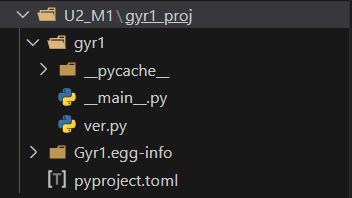

<h4>Luego vamos a instalar packages en modo "editable" o "development" usando el siguiente comando</h4>

In [ ]:
python -m pip install  -e

The command you provided, `python -m pip install -e`, is used for installing Python packages in "editable" or "development" mode. Let's break down what each part of this command means:

- `python`: This specifies the Python interpreter. It's the executable used to run Python scripts or commands.

- `-m pip`: This uses the `pip` module, which is the package manager for Python. The `-m` flag allows you to run Python modules as scripts.

- `install`: This is the `pip` command for installing Python packages.

- `-e`: This is the flag that tells `pip` to install the package in "editable" or "development" mode. In this mode, instead of copying the package's files to a specific location in your Python environment, `pip` creates a link to the package's source code directory. This means that any changes you make to the source code are immediately reflected in the installed package. It's especially useful during development when you're actively working on the package and want to see changes without reinstalling it each time.

When you run `python -m pip install -e`, it means you're using `pip` to install a Python package in editable mode, allowing you to make live changes to the package's source code, and those changes will be directly reflected when you import and use the package in your Python en

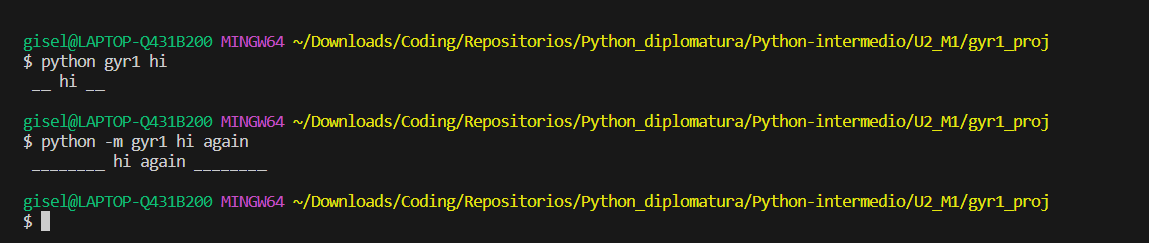vironment.

<h2>Comandos</h2>

Si quiero que personificar mi comando, puedo hacer lo siguiente: 

In [ ]:
# Archivo TOML - pyproject.TOML

[build-system]
requires = ["setuptools", "setuptools-scm"]
build-backend = "setuptools.build_meta"

[project]
name = "Gyr1"
version="1.0.0"

[project.scripts]
gyr1_comando = "gyr1.__main__:main"

 

In [ ]:
import sys
from gyr1 import ver

def main():

    ver.imprimir(" ".join(sys.argv[1:]))
 

# Esta línea verifica si este archivo se está ejecutando como el programa principal (no importado como un módulo). Si es así, se llama a la función main().
if __name__ == "__main__":
    main()

Para actualizar los cambios en el archivo TOML, vamos nuevamente a la carpeta del proyecto y ponemos el comando que necesitamos al principio 

In [ ]:
python -m pip install  -e

Luego de esto ya podemos poner el comando personificado, en este caso "gyr1_comando" + el argumento de la función que llamamos

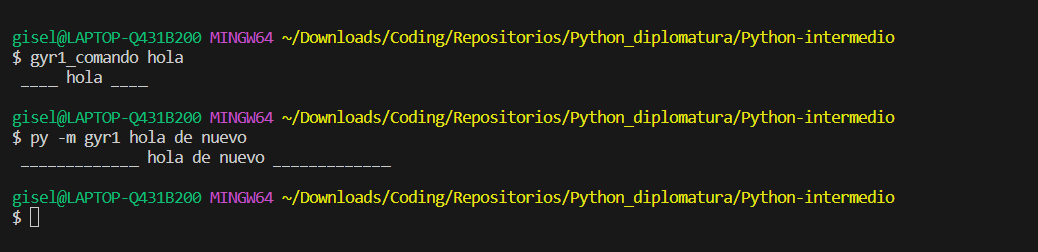

<h3>¿Qué es if __name__ == "__main__"?</h3>

We use the if-statement to run blocks of code only if our program is the main program executed. This allows our program to be executable by itself, but friendly to other Python modules who may want to import some functionality without having to run the code.

fuente: https://stackabuse.com/what-does-if-__name__-__main__-do-in-python/

muy buena fuenteted.

<h2>Transformar la app en modules</h2>

In [ ]:
# todo junto

from tkinter import *
from tkinter import ttk
import sqlite3
import re


##--Modelo--##


""" Base de datos """
def connexión():
    con = sqlite3.connect("women_in_music_original.db")
    con.execute("PRAGMA encoding = 'UTF-8'")
    return con

con = connexión()
cursor = con.cursor()
type_error = None
guardar_cambios_btn = None

def crear_tabla():
    sql = """CREATE TABLE IF NOT EXISTS mujeres_en_la_musica
             (id INTEGER PRIMARY KEY AUTOINCREMENT,
             nombre varchar(20) NOT NULL,
             país varchar(20) NOT NULL, 
             género varchar(20) NOT NULL,
             descripción TEXT NOT NULL
             )"""
    cursor.execute(sql)
    con.commit()

crear_tabla()

""" funciones de utilidad """

def update_treeview_GUI():
   for item in tree.get_children():
      tree.delete(item)

def clear_entries(val1, val2, val3, val4):
    entries = [val1, val2, val3, val4]
    for entry in entries:
        entry.delete(0, 'end')

def enter_event(e):
    buscar_item()

def advertencia(texto, colorfg, colorbg, row, col):
    global type_error
    type_error = Label(root, text=texto, fg=colorfg, bg=colorbg)
    type_error.grid(row=row, column=col)
    root.after(2000, lambda:type_error.destroy())  

def capitalized_doubled(artists_name):
    name_split = artists_name.split()
    if len(name_split) >= 2:
            name_split[0] = name_split[0].capitalize()
            name_split[1] = name_split[1].capitalize()
            name_capitalized = ' '.join(name_split)
            return name_capitalized
    else:
        return artists_name.capitalize()

""" CRUD """

def guardar(name, country, gender, description, tree):
    global type_error
    if not all((name, country, gender, description)):
        print("Error", "Please fill in all mandatory fields.")
        advertencia("se deben rellenar todas las entradas", "red", "white", 4, 1)
        return
    patron="^[a-zA-Z0-9 ]*$"
    if(re.match(patron, name)):
        print("entrada válida")
        name_capitalized = capitalized_doubled(name)
        data = (name_capitalized, country.capitalize(), gender.capitalize(), description.capitalize())
        sql = "INSERT INTO mujeres_en_la_musica(nombre, país, género, descripción) VALUES(?, ?, ?, ?)"
        cursor.execute(sql, data)
        con.commit()
        update_treeview_GUI()
        insert_treeview(tree)
        clear_entries(entry_name, entry_country, entry_gender, entry_description)
        advertencia("cantante guardada con éxito 😁", "green", "white", 4, 1)
       
    else:
        advertencia("Sólo se aceptan números o letras", "red", "white", 1, 1)


def eliminar_item(tree):
    items_seleccionados = tree.selection() 
    for item in items_seleccionados:
        id_item = tree.item(item, "text")
        print(id_item)
        mi_id = id_item
        print(type(mi_id))
        data = (mi_id,)
        sql = "DELETE FROM mujeres_en_la_musica WHERE id = ?"
        cursor.execute(sql, data)
        con.commit()
        tree.delete(item)


def insert_treeview(tree):

    sql = "SELECT * FROM mujeres_en_la_musica ORDER BY id ASC"
    datos = cursor.execute(sql)

    datos_db = datos.fetchall()
    for row in datos_db:
        tree.insert("", 0, text=row[0], values=(row[1], row[2], row[3], row[4]))

def buscar_item():
    update_treeview_GUI()
    sql = "SELECT * FROM mujeres_en_la_musica ORDER BY id ASC"
    datos = cursor.execute(sql)
    search_value = var_search.get().lower()  
    datos_db = datos.fetchall()
    for dato in datos_db:
        if any(search_value in str(value).lower() for value in dato):
                tree.insert("", 0, text=dato[0], values=(dato[1], dato[2], dato[3], dato[4]))


def editar_item():
    global guardar_cambios_btn
    selected_item = tree.selection()
    if selected_item:
        selected_id = tree.item(selected_item, "text") 
        sql_selection = "SELECT * FROM mujeres_en_la_musica WHERE id=?"
        cursor.execute(sql_selection, (selected_id,))
        row = cursor.fetchone()

        if row:
            var_name.set(row[1])
            var_country.set(row[2])
            var_gender.set(row[3])
            var_description.set(row[4])
            guardar_cambios_btn = Button(root, text="Guardar Cambios", command=guardar_cambios)
            guardar_cambios_btn.grid(row=4, column=1, pady=15)


def guardar_cambios():
    selected_item = tree.selection()
    selected_id = tree.item(selected_item, "text")

    cursor.execute("UPDATE mujeres_en_la_musica SET nombre=?, país=?, género=?, descripción=? WHERE id=?", (
        var_name.get(), var_country.get(), var_gender.get(), var_description.get(), selected_id))

    con.commit()
    clear_entries(entry_name, entry_country, entry_gender, entry_description)
    update_treeview_GUI()
    insert_treeview(tree)
    guardar_cambios_btn.destroy()

##--Vista--##

""" global """

root = Tk()

var_name = StringVar()
var_country = StringVar()
var_gender = StringVar()
var_description = StringVar()
var_search = StringVar()

bg_color = StringVar()

""" configuración estética de root """

root.geometry("675x450") 
root['pady'] = 20
root['padx'] = 20
root.title("Mujeres en la Música")
root.config(background = "black") 

""" labels """

name = Label(root, text="Nombre", fg="white", bg="black" )
name.grid(row=0, column=0, sticky=W)
country = Label(root, text="País", fg="white", bg="black")
country.grid(row=1, column=0, sticky=W)
gender = Label(root, text="Género", fg="white", bg="black")
gender.grid(row=2, column=0, sticky=W)
description = Label(root, text="Descripción", fg="white", bg="black")
description.grid(row=3, column=0, sticky=W)
search = Label(root, text="buscar", fg="white", bg="black")
search.grid(row=4, column=3, sticky=W)
# search.grid(row=4, column=0, sticky=W)



""" entries """

entry_name = Entry(root, textvariable=var_name, width=25)
entry_name.grid(row=0, column=1)
entry_country = Entry(root, textvariable=var_country, width=25)
entry_country.grid(row=1, column=1)
entry_gender = Entry(root, textvariable=var_gender, width=25)
entry_gender.grid(row=2, column=1)
entry_description = Entry(root, textvariable=var_description, width=25)
entry_description.grid(row=3, column=1)
entry_search = Entry(root, textvariable=var_search, width=15)
entry_search.grid(row=3, column=3, sticky=W)
# entry_search.grid(row=5, column=0, sticky=W)



""" treeview """
tree = ttk.Treeview(root)
tree["columns"]=("col1", "col2", "col3", "col4")
tree.column("#0", width=90, minwidth=50, anchor=W)
tree.column("col1", width=80, minwidth=80)
tree.column("col2", width=80, minwidth=80)
tree.column("col3", width=80, minwidth=80)
tree.column("col4", width=300, minwidth=80)
tree.heading("#0", text="ID")
tree.heading("col1", text="Nombre")
tree.heading("col2", text="País")
tree.heading("col3", text="Género")
tree.heading("col4", text="Descripción")
tree.grid(row=6, column=0, columnspan=4, pady=20)

""" buttons """

edit_btn = Button(root, text="Editar", command=editar_item)

edit_btn.grid(row=1, column=3, sticky=W)

btn_alta = Button(root, text="Guardar", command=lambda:guardar(var_name.get(), var_country.get(), var_gender.get(), var_description.get(), tree)
)
btn_alta.grid(row=1, column=2, sticky=W)


delete_btn = Button(root, text="Eliminar", command=lambda:eliminar_item(tree)
)
delete_btn.grid(row=3, column=2,sticky=W)




root.bind('<Return>', enter_event)
insert_treeview(tree)

root.mainloop()



In [ ]:
# view

from tkinter import StringVar
from tkinter import Label
from tkinter import Entry
from tkinter import ttk
from tkinter import Button

from model import editar_item
from model import guardar
from model import eliminar_item
from model import enter_event
from model import insert_treeview




def main_view(root):

    var_name = StringVar()
    var_country = StringVar()
    var_gender = StringVar()
    var_description = StringVar()
    var_search = StringVar()

    bg_color = StringVar()

    """ configuración estética de root """

    root.geometry("675x450") 
    root['pady'] = 20
    root['padx'] = 20
    root.title("Mujeres en la Música")
    root.config(background = "black") 

    """ labels """

    name = Label(root, text="Nombre", fg="white", bg="black" )
    name.grid(row=0, column=0, sticky="w")
    country = Label(root, text="País", fg="white", bg="black")
    country.grid(row=1, column=0, sticky="w")
    gender = Label(root, text="Género", fg="white", bg="black")
    gender.grid(row=2, column=0, sticky="w")
    description = Label(root, text="Descripción", fg="white", bg="black")
    description.grid(row=3, column=0, sticky="w")
    search = Label(root, text="buscar", fg="white", bg="black")
    search.grid(row=4, column=3, sticky="w")
    # search.grid(row=4, column=0, sticky=W)



    """ entries """

    entry_name = Entry(root, textvariable=var_name, width=25)
    entry_name.grid(row=0, column=1)
    entry_country = Entry(root, textvariable=var_country, width=25)
    entry_country.grid(row=1, column=1)
    entry_gender = Entry(root, textvariable=var_gender, width=25)
    entry_gender.grid(row=2, column=1)
    entry_description = Entry(root, textvariable=var_description, width=25)
    entry_description.grid(row=3, column=1)
    entry_search = Entry(root, textvariable=var_search, width=15)
    entry_search.grid(row=3, column=3, sticky="w")
    # entry_search.grid(row=5, column=0, sticky=W)



    """ treeview """
    tree = ttk.Treeview(root)
    tree["columns"]=("col1", "col2", "col3", "col4")
    tree.column("#0", width=90, minwidth=50, anchor="w")
    tree.column("col1", width=80, minwidth=80)
    tree.column("col2", width=80, minwidth=80)
    tree.column("col3", width=80, minwidth=80)
    tree.column("col4", width=300, minwidth=80)
    tree.heading("#0", text="ID")
    tree.heading("col1", text="Nombre")
    tree.heading("col2", text="País")
    tree.heading("col3", text="Género")
    tree.heading("col4", text="Descripción")
    tree.grid(row=6, column=0, columnspan=4, pady=20)

    """ buttons """

    edit_btn = Button(root, text="Editar", command=lambda:editar_item(root, tree, var_name, var_country, var_gender, var_description, entry_name, entry_country, entry_gender, entry_description ))

    edit_btn.grid(row=1, column=3, sticky="w")

    btn_alta = Button(root, text="Guardar", command=lambda:guardar(var_name.get(), var_country.get(), var_gender.get(), var_description.get(), tree, entry_name, entry_country, entry_gender, entry_description, root)
    )
    btn_alta.grid(row=1, column=2, sticky="w")


    delete_btn = Button(root, text="Eliminar", command=lambda:eliminar_item(tree)
    )
    delete_btn.grid(row=3, column=2,sticky="w")




    root.bind('<Return>',  lambda event:enter_event(event, tree, var_search))
    insert_treeview(tree)

In [ ]:
# model

from tkinter import Label
from tkinter import Button
import sqlite3
import re


##--Modelo--##


""" Base de datos """
def connexión():
    con = sqlite3.connect("women_in_music.db")
    con.execute("PRAGMA encoding = 'UTF-8'")
    return con

con = connexión()
cursor = con.cursor()
type_error = None
guardar_cambios_btn = None

def crear_tabla():
    sql = """CREATE TABLE IF NOT EXISTS mujeres_en_la_musica
             (id INTEGER PRIMARY KEY AUTOINCREMENT,
             nombre varchar(20) NOT NULL,
             país varchar(20) NOT NULL, 
             género varchar(20) NOT NULL,
             descripción TEXT NOT NULL
             )"""
    cursor.execute(sql)
    con.commit()

crear_tabla()

""" funciones de utilidad """

def update_treeview_GUI(tree):
   for item in tree.get_children():
      tree.delete(item)

def clear_entries(val1, val2, val3, val4):
    entries = [val1, val2, val3, val4]
    for entry in entries:
        entry.delete(0, 'end')


def enter_event(e, tree, var_search):
    buscar_item(tree, var_search)

def advertencia(texto, colorfg, colorbg, row, col, root):
    global type_error
    type_error = Label(root, text=texto, fg=colorfg, bg=colorbg)
    type_error.grid(row=row, column=col)
    root.after(2000, lambda:type_error.destroy())  

def capitalized_doubled(artists_name):
    name_split = artists_name.split()
    if len(name_split) >= 2:
            name_split[0] = name_split[0].capitalize()
            name_split[1] = name_split[1].capitalize()
            name_capitalized = ' '.join(name_split)
            return name_capitalized
    else:
        return artists_name.capitalize()

""" CRUD """

def guardar(name, country, gender, description, tree, entry_name, entry_country, entry_gender, entry_description, root):
    global type_error
    if not all((name, country, gender, description)):
        print("Error", "Please fill in all mandatory fields.")
        advertencia("se deben rellenar todas las entradas", "red", "white", 4, 1, root)
        return
    patron="^[a-zA-Z0-9 ]*$"
    if(re.match(patron, name)):
        print("entrada válida")
        name_capitalized = capitalized_doubled(name)
        data = (name_capitalized, country.capitalize(), gender.capitalize(), description.capitalize())
        sql = "INSERT INTO mujeres_en_la_musica(nombre, país, género, descripción) VALUES(?, ?, ?, ?)"
        cursor.execute(sql, data)
        con.commit()
        update_treeview_GUI(tree)
        insert_treeview(tree)
        clear_entries(entry_name, entry_country, entry_gender, entry_description)
        advertencia("cantante guardada con éxito 😁", "green", "white", 4, 1, root)
       
    else:
        advertencia("Sólo se aceptan números o letras", "red", "white", 1, 1, root)


def eliminar_item(tree):
    items_seleccionados = tree.selection() 
    for item in items_seleccionados:
        id_item = tree.item(item, "text")
        print(id_item)
        mi_id = id_item
        print(type(mi_id))
        data = (mi_id,)
        sql = "DELETE FROM mujeres_en_la_musica WHERE id = ?"
        cursor.execute(sql, data)
        con.commit()
        tree.delete(item)


def insert_treeview(tree):

    sql = "SELECT * FROM mujeres_en_la_musica ORDER BY id ASC"
    datos = cursor.execute(sql)

    datos_db = datos.fetchall()
    for row in datos_db:
        tree.insert("", 0, text=row[0], values=(row[1], row[2], row[3], row[4]))

def buscar_item(tree, var_search):
    update_treeview_GUI(tree)
    sql = "SELECT * FROM mujeres_en_la_musica ORDER BY id ASC"
    datos = cursor.execute(sql)
    search_value = var_search.get().lower()  
    datos_db = datos.fetchall()
    for dato in datos_db:
        if any(search_value in str(value).lower() for value in dato):
                tree.insert("", 0, text=dato[0], values=(dato[1], dato[2], dato[3], dato[4]))


def editar_item(root, tree, var_name, var_country, var_gender, var_description, entry_name, entry_country, entry_gender, entry_description):
    global guardar_cambios_btn
    selected_item = tree.selection()
    if selected_item:
        selected_id = tree.item(selected_item, "text") 
        sql_selection = "SELECT * FROM mujeres_en_la_musica WHERE id=?"
        cursor.execute(sql_selection, (selected_id,))
        row = cursor.fetchone()

        if row:
            var_name.set(row[1])
            var_country.set(row[2])
            var_gender.set(row[3])
            var_description.set(row[4])
            guardar_cambios_btn = Button(root, text="Guardar Cambios", command=lambda:guardar_cambios(tree, var_name, var_country, var_gender, var_description, entry_name, entry_country, entry_gender, entry_description))
            guardar_cambios_btn.grid(row=4, column=1, pady=15)


def guardar_cambios(tree, var_name, var_country, var_gender, var_description, entry_name, entry_country, entry_gender, entry_description) :
    selected_item = tree.selection()
    selected_id = tree.item(selected_item, "text")

    cursor.execute("UPDATE mujeres_en_la_musica SET nombre=?, país=?, género=?, descripción=? WHERE id=?", (
        var_name.get(), var_country.get(), var_gender.get(), var_description.get(), selected_id))

    con.commit()
    clear_entries(entry_name, entry_country, entry_gender, entry_description)
    update_treeview_GUI(tree)
    insert_treeview(tree)
    guardar_cambios_btn.destroy()


In [ ]:
# controller

from tkinter import Tk 

import view

if __name__ == "__main__":
    root_tk = Tk()

    view.main_view(root_tk)

    root_tk.mainloop()